In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [30]:
zomato = pd.read_csv('C:\\Users\\Anurag\\Downloads\\archive(7)\\zomato.csv')

In [31]:
zomato.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [32]:
zomato.shape

(56251, 13)

In [33]:
zomato.dtypes

address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                          object
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
dtype: object

In [34]:
# Define a function to clean 'online_order' and 'book_table' columns
def clean_binary_columns(value):
    if value == 'Yes':
        return 1
    elif value == 'No':
        return 0
    else:
        return pd.NaT

In [35]:
# Clean 'online_order' and 'book_table' columns
zomato['online_order'] = zomato['online_order'].apply(clean_binary_columns)
zomato['book_table'] = zomato['book_table'].apply(clean_binary_columns)

In [36]:
# Remove '/5' from 'rate' and convert to numeric
zomato['rate'] = zomato['rate'].str.replace('/5', '')
zomato['rate'] = pd.to_numeric(zomato['rate'], errors='coerce')

In [37]:
# Convert 'votes' to numeric
zomato['votes'] = pd.to_numeric(zomato['votes'], errors='coerce')

In [38]:
# Remove commas from 'approx_cost(for two people)' and convert to numeric
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].str.replace(',', '')
zomato['approx_cost(for two people)'] = pd.to_numeric(zomato['approx_cost(for two people)'], errors='coerce')

In [39]:

# Define a function to clean 'location', 'rest_type', 'cuisines', and 'listed_in(type)' columns
def clean_categorical_columns(value, common_values):
    if pd.isnull(value):
        return pd.NaT
    elif value in common_values:
        return value
    else:
        return 'Other'

In [40]:
# Keep top 10 most common locations, restaurant types, cuisines, and types
top_locations = zomato['location'].value_counts()[:10].index.tolist()
top_rest_types =zomato['rest_type'].value_counts()[:10].index.tolist()
top_cuisines = zomato['cuisines'].value_counts()[:10].index.tolist()
top_types = zomato['listed_in(type)'].value_counts()[:10].index.tolist()

In [41]:
# Clean 'location', 'rest_type', 'cuisines', and 'listed_in(type)' columns
zomato['location'] = zomato['location'].apply(clean_categorical_columns, common_values=top_locations)
zomato['rest_type'] = zomato['rest_type'].apply(clean_categorical_columns, common_values=top_rest_types)
zomato['cuisines'] = zomato['cuisines'].apply(clean_categorical_columns, common_values=top_cuisines)
zomato['listed_in(type)'] = zomato['listed_in(type)'].apply(clean_categorical_columns, common_values=top_types)

In [42]:
zomato

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775.0,080 42297555\r\n+91 9743772233,Other,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",Other,800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787.0,080 41714161,Other,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Other,800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918.0,+91 9663487993,Other,Other,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",Other,800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88.0,+91 9620009302,Other,Quick Bites,Masala Dosa,Other,300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166.0,+91 8026612447\r\n+91 9901210005,Other,Casual Dining,"Panipuri, Gol Gappe",Other,600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56246,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27.0,080 40301477,Whitefield,Bar,NaN,Other,1500.0,Pubs and bars
56247,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,NaN,0.0,+91 8197675843,Whitefield,Bar,NaN,Other,600.0,Pubs and bars
56248,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0.0,NaN,Whitefield,Bar,NaN,Other,2000.0,Pubs and bars
56249,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236.0,080 49652769,Other,Bar,"Cocktails, Pizza, Buttermilk",Other,2500.0,Pubs and bars


In [43]:
# Check for missing values in the data
zomato.isna().sum()

address                           17
name                              16
online_order                    4534
book_table                      4534
rate                           14586
votes                           4534
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)     4880
listed_in(type)                 4610
dtype: int64

In [44]:
# Impute missing values in 'online_order' and 'book_table' with the mode
for col in ['online_order', 'book_table']:
    zomato[col] = zomato[col].fillna(zomato[col].mode().iloc[0])

# Impute missing values in 'rate' and 'votes' with the median
for col in ['rate', 'votes']:
   zomato[col] = zomato[col].fillna(zomato[col].median())

# Impute missing values in 'location', 'rest_type', 'cuisines', and 'listed_in(type)' with 'Unknown'
for col in ['location', 'rest_type', 'cuisines', 'listed_in(type)']:
    zomato[col] = zomato[col].fillna('Unknown')

# Check for missing values in the data again
zomato.isna().sum()

address                           17
name                              16
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1296
location                           0
rest_type                          0
dish_liked                     28225
cuisines                           0
approx_cost(for two people)     4880
listed_in(type)                    0
dtype: int64

In [45]:
# Drop the 'phone' and 'dish_liked' columns
zomato = zomato.drop(columns=['phone', 'dish_liked'], axis=1)

# Impute missing values in 'approx_cost(for two people)' with the median
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].fillna(zomato['approx_cost(for two people)'].median())

# Check for missing values in the data again
zomato.isna().sum()

address                        17
name                           16
online_order                    0
book_table                      0
rate                            0
votes                           0
location                        0
rest_type                       0
cuisines                        0
approx_cost(for two people)     0
listed_in(type)                 0
dtype: int64

In [47]:
# Drop the 'address' and 'name' columns
zomato = zomato .drop(columns=['address', 'name'])

# Check for missing values in the data again
zomato .isna().sum()

online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [49]:
# Display a summary of the dataset
display(zomato.describe(include='all'))

# Display unique values in the categorical columns
for col in ['location', 'rest_type', 'cuisines', 'listed_in(type)']:
    print(f'{col}:\n{zomato[col].unique()}\n')

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
count,56251.000000,56251.000000,56251.000000,56251.000000,56251,56251,56251,56251.000000,56251
unique,NaN,NaN,NaN,NaN,12,12,12,NaN,12
top,NaN,NaN,NaN,NaN,Other,Quick Bites,Other,NaN,Delivery
freq,NaN,NaN,NaN,NaN,32823,19132,43391,NaN,24317
mean,0.621820,0.114647,3.700332,264.135375,NaN,NaN,NaN,541.947254,NaN
std,0.484937,0.318598,0.379121,773.588307,NaN,NaN,NaN,421.658401,NaN
min,0.000000,0.000000,1.800000,0.000000,NaN,NaN,NaN,40.000000,NaN
25%,0.000000,0.000000,3.500000,8.000000,NaN,NaN,NaN,300.000000,NaN
50%,1.000000,0.000000,3.700000,41.000000,NaN,NaN,NaN,400.000000,NaN
75%,1.000000,0.000000,3.900000,171.000000,NaN,NaN,NaN,600.000000,NaN


location:
['Other' 'Jayanagar' 'JP Nagar' 'Bannerghatta Road' 'BTM' 'Unknown' 'HSR'
 'Marathahalli' 'Koramangala 5th Block' 'Bellandur' 'Whitefield'
 'Indiranagar']

rest_type:
['Casual Dining' 'Other' 'Quick Bites' 'Cafe' 'Delivery' 'Dessert Parlor'
 'Bakery' 'Takeaway, Delivery' 'Beverage Shop' 'Bar' 'Casual Dining, Bar'
 'Unknown']

cuisines:
['Other' 'North Indian' 'Cafe' 'Bakery, Desserts' 'Biryani' 'South Indian'
 'North Indian, Chinese' 'Bakery' 'Fast Food' 'Desserts'
 'South Indian, North Indian, Chinese' 'Unknown']

listed_in(type):
['Buffet' 'Cafes' 'Unknown' 'Other' 'Delivery' " ('Rated 4.0'" 'Desserts'
 'Dine-out' 'Drinks & nightlife' " ('Rated 3.0'" " ('Rated 5.0'"
 'Pubs and bars']



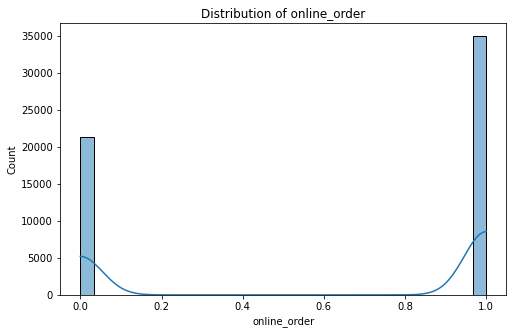

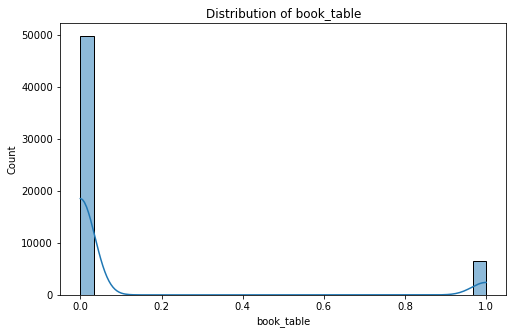

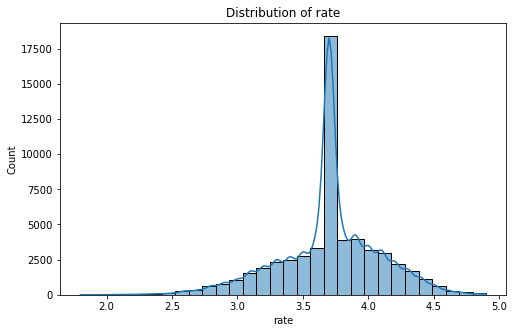

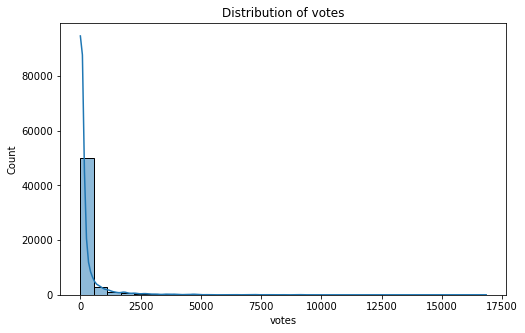

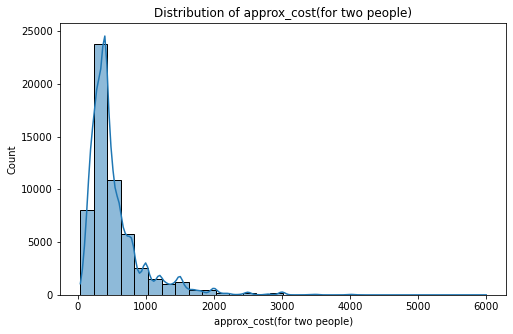

In [50]:
# Plot histograms for the numerical columns
numerical_cols = ['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(zomato[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

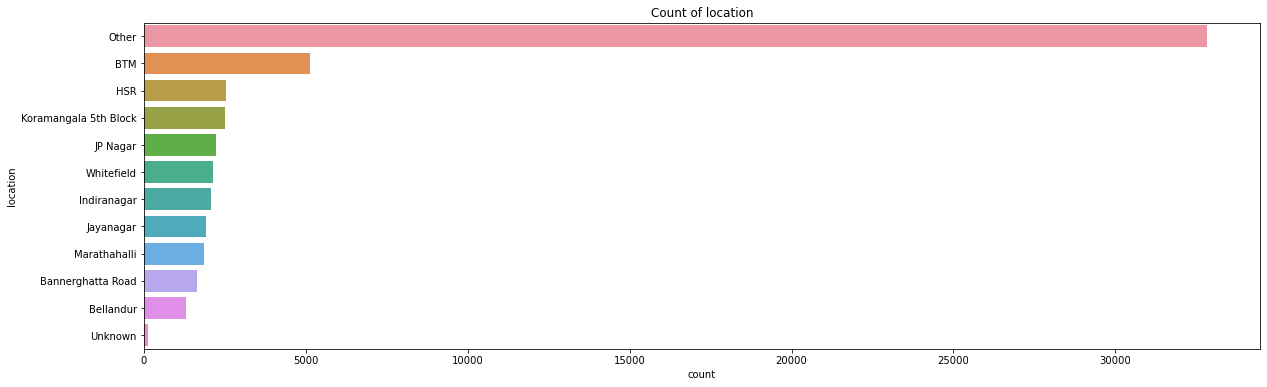

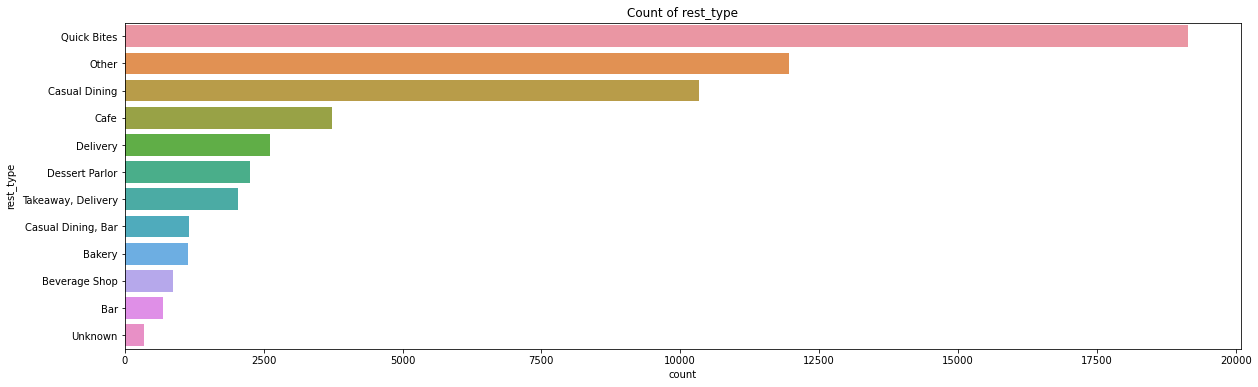

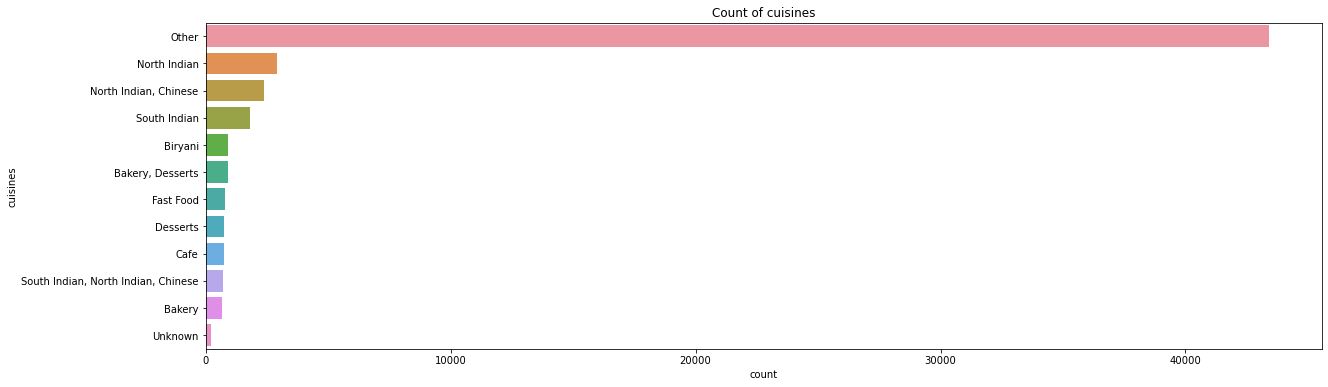

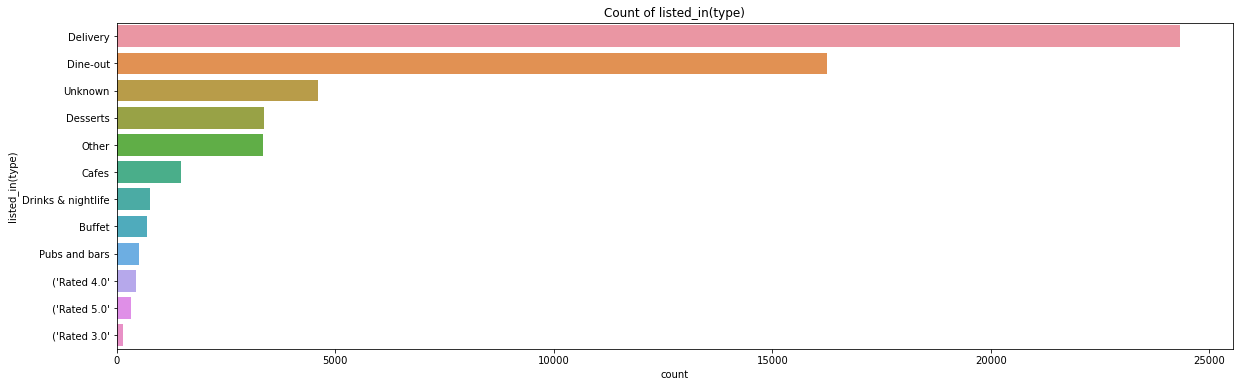

In [53]:
# Plot count plots for the categorical columns
categorical_cols = ['location', 'rest_type', 'cuisines', 'listed_in(type)']
for col in categorical_cols:
    plt.figure(figsize=(20, 6))
    sns.countplot(y=col, data=zomato, order=zomato[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

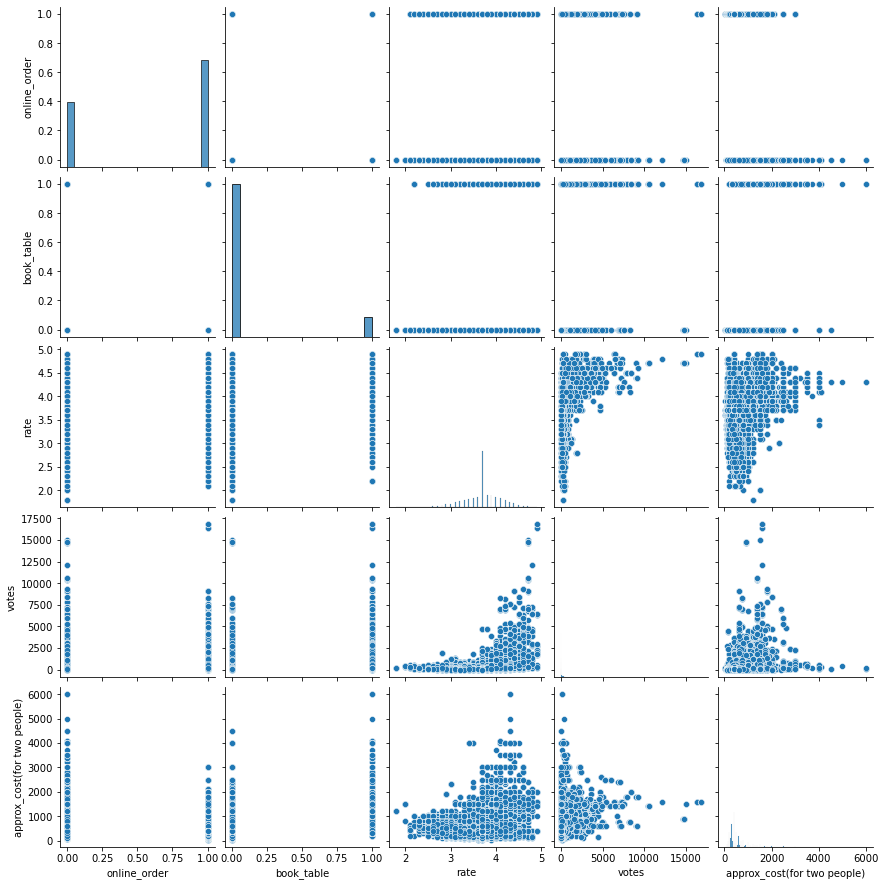

In [55]:
# Create a pairplot for the numerical variables
sns.pairplot(zomato[numerical_cols])
plt.show()

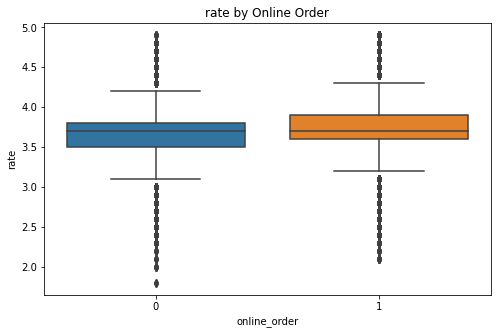

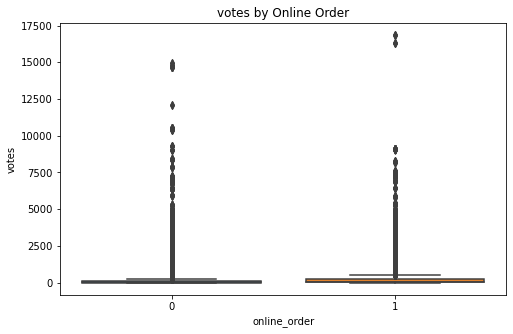

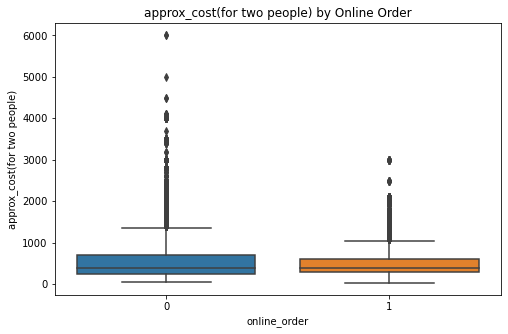

In [56]:
# Create box plots to compare the distributions of 'rate', 'votes', and 'approx_cost(for two people)'
# for online order accepting and non-accepting restaurants
for col in ['rate', 'votes', 'approx_cost(for two people)']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='online_order', y=col, data=zomato)
    plt.title(f'{col} by Online Order')
    plt.show()

In [57]:
# Feature Engineering: Adding a new column 'expensive' based on the 'approx_cost(for two people)'
# We consider a restaurant as expensive if the cost for two people is higher than the median
median_cost = zomato['approx_cost(for two people)'].median()
zomato['expensive'] = zomato['approx_cost(for two people)'].apply(lambda x: 1 if x > median_cost else 0)

# Drop the original 'approx_cost(for two people)' column
zomato = zomato.drop(columns='approx_cost(for two people)')

# Check the first few rows of the dataframe
zomato.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),expensive
0,1,1,4.1,775.0,Other,Casual Dining,Other,Buffet,1
1,1,0,4.1,787.0,Other,Casual Dining,Other,Buffet,1
2,1,0,3.8,918.0,Other,Other,Other,Buffet,1
3,0,0,3.7,88.0,Other,Quick Bites,Other,Buffet,0
4,0,0,3.8,166.0,Other,Casual Dining,Other,Buffet,1


In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Select the predictors and the target variable
X = zomato.drop(columns='expensive')
y =zomato['expensive']

# Apply one-hot encoding to the categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check the shapes of the training set and the test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45000, 2403), (11251, 2403), (45000,), (11251,))

In [63]:
from sklearn.preprocessing import MaxAbsScaler

# Scale the data with MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the first few rows of the scaled data
X_train_scaled[:5, :5]

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

# Classification Modelling for Expensive or Not Expensive Restaurant

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Train, predict, and evaluate each model
model_scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores.append((name, accuracy, precision, recall, f1))
    
# Create a dataframe to store the scores of all models
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the scores of all models
model_scores_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.859390,0.889974,0.769405,0.825309
1,Decision Tree,0.853969,0.896594,0.747993,0.815580
2,Random Forest,0.917696,0.936681,0.868026,0.901047
3,Gradient Boosting,0.851747,0.891480,0.747581,0.813214


# Regression Analysis for Rating Prediction

In [75]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)),
    ('Lasso Regression', LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)),
    ('ElasticNet Regression', ElasticNetCV(alphas=[0.1, 1.0, 10.0], cv=5)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Train, predict, and evaluate each model
model_scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    scores = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring='neg_root_mean_squared_error')
    rmse = -scores.mean()  # cross_val_score returns negative scores for error metrics
    model_scores.append((name, rmse))

# Create a dataframe to store the scores of all models
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'RMSE'])

# Display the scores of all models
model_scores_df

,Model,RMSE
0,Linear Regression,0.352171
1,Ridge Regression,0.338748
2,Lasso Regression,0.495351
3,ElasticNet Regression,0.442047
4,Random Forest,0.312735
5,Gradient Boosting,0.333463


# Clustering for Restaurant Segmentation and Insights

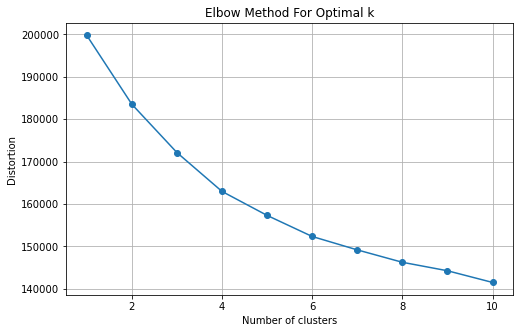

In [77]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [79]:
# Fit the K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)

# Get the cluster assignments for each instance
clusters_train = kmeans.labels_

# Predict the clusters for test data
clusters_test = kmeans.predict(X_test_scaled)

# Combine train and test data back together
clusters = np.concatenate((clusters_train, clusters_test))
# Add the cluster assignments to the dataframe
zomato['cluster'] = clusters

# Display the first few rows of the dataframe
zomato.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),expensive,cluster
0,1,1,4.1,775.0,Other,Casual Dining,Other,Buffet,1,1
1,1,0,4.1,787.0,Other,Casual Dining,Other,Buffet,1,3
2,1,0,3.8,918.0,Other,Other,Other,Buffet,1,1
3,0,0,3.7,88.0,Other,Quick Bites,Other,Buffet,0,1
4,0,0,3.8,166.0,Other,Casual Dining,Other,Buffet,1,0


In [82]:
# Calculate mean of numerical features for each cluster
numerical_cols = ['online_order', 'book_table', 'rate', 'votes', 'expensive']
cluster_means = zomato.groupby('cluster')[numerical_cols].mean()

# Calculate mode of categorical features for each cluster
categorical_cols = ['location', 'rest_type', 'cuisines', 'listed_in(type)']
cluster_modes = zomato.groupby('cluster')[categorical_cols].agg(lambda x: x.value_counts().index[0])

# Combine the mean and mode dataframes
cluster_characteristics = pd.concat([cluster_means, cluster_modes], axis=1)
cluster_characteristics

,online_order,book_table,rate,votes,expensive,location,rest_type,cuisines,listed_in(type)
cluster,,,,,,,,,
0,0.621583,0.112828,3.705351,263.297927,0.436484,Other,Quick Bites,Other,Delivery
1,0.621186,0.117311,3.698997,265.026329,0.436085,Other,Quick Bites,Other,Delivery
2,0.619440,0.116548,3.700245,251.428603,0.452847,Other,Quick Bites,Other,Delivery
3,0.622794,0.113351,3.698930,266.275705,0.430981,Other,Quick Bites,Other,Delivery


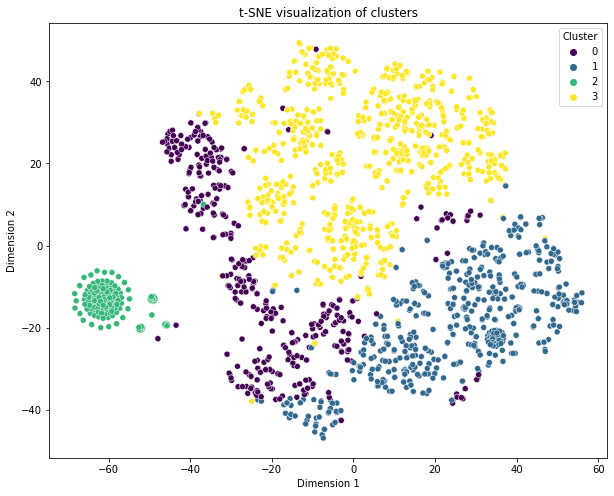

In [86]:
import random
import numpy as np
from sklearn.manifold import TSNE


# Apply t-SNE to the data
sample_indices = random.sample(range(X_train_scaled.shape[0]), 2000)
X_sample = X_train_scaled[sample_indices]
clusters_sample = clusters_train[sample_indices]

tsne = TSNE(n_components=2, init='random', random_state=42)
X_sample_tsne = tsne.fit_transform(X_sample.toarray())  # Convert sparse matrix to dense

# Create a DataFrame to hold the t-SNE results
tsne_df = pd.DataFrame(data=X_sample_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters_sample

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', palette='viridis', data=tsne_df)
plt.title('t-SNE visualization of clusters')
plt.show()